<center>
<h1><b>Homework 5</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>November 14, 2020</b></h3>
</center>
<hr>

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

plt.style.use('dark_background')
pd.set_option('use_inf_as_na', True)

```python
def boi(a):
    print(a)
```

```c


#include <iostream>
using namespace std;


template <typename T>
std::vector<T> linspace(T a, T b, size_t N) {
    T h = (b - a) / static_cast<T>(N-1);
    std::vector<T> xs(N);
    typename std::vector<T>::iterator x;
    T val;
    for (x = xs.begin(), val = a; x != xs.end(); ++x, val += h)
        *x = val;
    return xs;
}


class IsingModel{
    int rows;    // Number Of Rows In The Ising Lattice
    int cols;    // Number Of Columns In The Ising Lattice
    int n_T;     // Number Of Temperature Values To Sweep
    int n_h;     // Number Of Magnetic Field Magnitudes To Sweep
    int n_S;     // Sample Size
    int n_R;     // Number Of "Relaxation" Updates To Perform
    double h_i;  // Initial Magnetic Field Magnitude
    double h_f;  // Final Magnetic Field Magnitude
    double J;    // Ferromagnetic Coupling Constant
    double k_B;  // Boltzmann's Constant
    double T_i;  // Initial Temperature Value
    double T_f;  // Final Temperature Value
    double scale;  // Scaling Factor Correcting For Lattice Size
    std::vector<double>{} magnetic_field_magnitude_range;
    std::vector<double>{} temperature_range;
    std::vector<double>{} energy_sample;
    std::vector<double>{} magnetization_sample;
    std::vector<double>{} magnetic_field_magnitudes;  // A Data Container For Magnetic Field Magnitudes
    std::vector<double>{} T;  // A Data Container For Temperatures
    std::vector<double>{} E;  // A Data Container For Energy
    std::vector<double>{} M;  // A Data Container For Magnetization
    std::vector<double>{} C;  // A Data Container For Specific Heat Capacity
    std::vector<double>{} X;  // A Data Container For Magnetic Susceptibility
    std::vector<std::vector<int>>{}  at;  // The Ising Lattice

    public:
        IsingModel(int, int, double, double, double, double, int, double, double, int, int, int);
}
```

    IsingModel::IsingModel(int rows, int cols, double J, double k_B, double T_i, double T_f, int n_T, double h_i, double h_f, int n_h, int n_R, int n_S){    
        // Assign Inputted Object Attributes
        rows = _rows; cols = _cols;
        J = _J; k_B = _k_B;
        T_i = _T_i; T_f = _T_f; n_T = _n_T;
        h_i = _h_i; h_f = _h_f; n_h = _n_h;
        n_R = _n_R; n_S = _n_S;
        
        // Assign Created Object Attributes
        std::vector<double> temperature_range = linspace(T_i, T_f, n_T);
        std::vector<double> magnetic_field_magnitude_range = linspace(h_i, h_f, n_h);
        const double scale = 1.0 / (rows * cols);
        at = np.random.choice(np.array([1, -1]), size=(self.rows, self.cols))

        self.energy_sample, self.magnetization_sample = np.zeros(self.n_S), np.zeros(self.n_S)
        self.magnetic_field_magnitudes = np.zeros(self.n_h * self.n_T)
        self.T = np.zeros(self.n_h * self.n_T)
        self.E = np.zeros(self.n_h * self.n_T)
        self.M = np.zeros(self.n_h * self.n_T)
        self.C = np.zeros(self.n_h * self.n_T)
        self.X = np.zeros(self.n_h * self.n_T)
}
    def metric_at(self, i, j):
        return self.at[            (i + 1) % self.rows,                               j] +\
               self.at[(i - 1 + self.rows) % self.rows,                               j] +\
               self.at[                              i,             (j + 1) % self.cols] +\
               self.at[                              i, (j - 1 + self.cols) % self.cols]

    def get_E(self):
        return self.scale * np.mean(self.energy_sample)
        
    def get_M(self):
        return self.scale * np.mean(self.magnetization_sample)
        
    def get_C(self, temperature):
        return self.scale * np.var(self.energy_sample) * temperature ** (-2.0)
    
    def get_X(self, temperature):
        return self.scale * np.var(self.magnetization_sample) * temperature ** (-1.0)

    def metric(self):
        _ = np.zeros_like(self.at)
        for i in range(self.rows):
            for j in range(self.cols):
                _[i, j] = self.metric_at(i, j)
        return _

    def update(self, magnetic_field_magnitude, temperature):
        for i in range(self.rows):
            for j in range(self.cols):
                dE = 2.0 * (self.J * self.metric_at(i, j) - magnetic_field_magnitude) * self.at[i, j]
                prob = 1.0 if dE < 0.0 else np.exp(-dE / (self.k_B * temperature))
                if np.random.random() < prob:
                    self.at[i, j] = -self.at[i, j]            

    def relax(self, magnetic_field_magnitude, temperature):
        for _ in range(self.n_R):
            self.update(magnetic_field_magnitude, temperature)

    def measure_at(self, magnetic_field_magnitude, temperature):
        for _ in range(self.n_S):
            self.update(magnetic_field_magnitude, temperature)
            dE = 2.0 * (self.J * self.metric() - magnetic_field_magnitude) * self.at
            self.energy_sample[_] = -0.5 * np.sum(dE)
            self.magnetization_sample[_] = np.sum(self.at)
        return magnetic_field_magnitude, temperature, self.get_E(), self.get_M(), self.get_C(temperature), self.get_X(temperature)

    def reset(self):
        self.at = np.random.choice(np.array([1, -1]), size=(self.rows, self.cols))

    def simulate(self):
        for i_h in range(self.n_h):
            magnetic_field_magnitude = self.magnetic_field_magnitude_range[i_h]
            for i_t in range(self.n_T):
                temperature = self.temperature_range[i_t]
                line = i_h * self.n_T + i_t
                print('Running:', 100.0 * line / (self.n_T * self.n_h), '%')
                self.reset()
                self.relax(magnetic_field_magnitude, temperature)
                self.magnetic_field_magnitudes[line], self.T[line], self.E[line], self.M[line], self.C[line], self.X[line] = self.measure_at(magnetic_field_magnitude, temperature)
        return self.H, self.T, self.E, self.M, self.C, self.X


### Load External Files

In [2]:
%run -n ../../../../../GitHub/Cluster-Growth/ClusterGrowth.py  # For anyone else: %run -n ClusterGrowth.py
P1=main  # The default example is precisely problem 1
%run ../../../../../GitHub/Ising-Model-Visual/python/IsingModel.py  # For anyone else: %run IsingModel.py

In [3]:
rows, cols = 15, 15
T0, dT, Tc, nT = 0.1, 1.0, 2 / np.log(1 + np.sqrt(2)), 100
H0, Hi, Hf, nH = 0.0, -10.0, 10.0, 100
kB = J = 1.0
sS, nR = 10000, 10000
linfit = lambda x, c0, c1 : c0 + c1 * x

# Problem 1
## 7.30 (p.228)

Generate a spanning cluster for a two dimnsional square lattice at $p=p_c$ using any of the search methods discussed in connection with Figure 7.29. Estimate the fractal dimensionality of the cluster. You should find a value of $d_f$, which is slightly smaller than $2$ (the expected value is $91/48\approx1.90$).

In [4]:
# P1()

# Problem 2
## 8.3 (p.257)

Calculate $M$ for the Ising model on a square lattice and try to estimate $\beta$. You should find a value close to $1/8$. Repeat this calculation for a triangular lattice. It turns out that $\beta$ is the same for all regular two dimensional lattices. However, its value does depend on the dimensionality, as studied in the next problem.

_Hint:_ You should find that the power law (8.17) with $\beta\approx1/8$ is obeyed reasonably well for $2.0<T<T_c\approx2.27$.

It is enough if you calculate __either__ for the square grid, __or__ the triangular one (the latter takes a little more thought). Doing both cases is optional.

In [5]:
model_a  = IsingLattice(rows, cols, J, kB, Tc, Tc + dT, nT, H0, Hf, 1, nR, sS)
H_a, T_a, E_a, M_a, C_a, X_a = model_a.simulate()

df2a = pd.DataFrame(
    np.vstack((H_a, T_a, E_a, C_a, M_a, X_a)).T, 
    columns=['MagneticField','Temperature', 'Energy', 'SpecificHeatCapacity', 'Magnetization', 'MagneticSusceptibility'])
df2a.to_csv('Problem2_alpha_data.csv')

df2a[     'y'] = df2a.SpecificHeatCapacity.apply(lambda _ :  np.log(np.abs(_)))
df2a[     'x'] = df2a.Temperature.apply(lambda _ : -np.log(np.abs(_ - Tc)))
df2a['yprime'] = df2a.y.where(df2a.Temperature > Tc).where(df2a.x <= df2a.x.mean() + 0.5 * df2a.x.std())

df2a_ = df2a[['x', 'yprime']].dropna()
(c_alpha, alpha), _ = curve_fit(linfit, df2a_.x.values, df2a_.yprime.values)
df2a_['fit'] = df2a_.x.apply(lambda _ : linfit(_, c_alpha, alpha))

Running: 0.0 %
Running: 1.0 %
Running: 2.0 %
Running: 3.0 %
Running: 4.0 %
Running: 5.0 %
Running: 6.0 %
Running: 7.0 %
Running: 8.0 %
Running: 9.0 %
Running: 10.0 %
Running: 11.0 %
Running: 12.0 %
Running: 13.0 %
Running: 14.0 %
Running: 15.0 %
Running: 16.0 %
Running: 17.0 %
Running: 18.0 %
Running: 19.0 %
Running: 20.0 %
Running: 21.0 %
Running: 22.0 %
Running: 23.0 %
Running: 24.0 %
Running: 25.0 %
Running: 26.0 %
Running: 27.0 %
Running: 28.0 %
Running: 29.0 %
Running: 30.0 %
Running: 31.0 %
Running: 32.0 %
Running: 33.0 %
Running: 34.0 %
Running: 35.0 %
Running: 36.0 %
Running: 37.0 %
Running: 38.0 %
Running: 39.0 %
Running: 40.0 %
Running: 41.0 %
Running: 42.0 %
Running: 43.0 %
Running: 44.0 %
Running: 45.0 %
Running: 46.0 %
Running: 47.0 %
Running: 48.0 %
Running: 49.0 %
Running: 50.0 %
Running: 51.0 %
Running: 52.0 %
Running: 53.0 %
Running: 54.0 %
Running: 55.0 %
Running: 56.0 %
Running: 57.0 %
Running: 58.0 %
Running: 59.0 %
Running: 60.0 %
Running: 61.0 %
Running: 62.0 %
Ru

In [6]:
model_b  = IsingLattice(rows, cols, J, kB, Tc - dT, Tc, nT, H0, Hf, 1, nR, sS)
H_b, T_b, E_b, M_b, C_b, X_b = model_b.simulate()

df2b = pd.DataFrame(
    np.vstack((H_b, T_b, E_b, C_b, M_b, X_b)).T, 
    columns=['MagneticField','Temperature', 'Energy', 'SpecificHeatCapacity', 'Magnetization', 'MagneticSusceptibility'])
df2b.to_csv('Problem2_beta_data.csv')

df2b[     'y'] = df2b.Magnetization.apply(lambda _ :  np.log(np.abs(_)))
df2b[     'x'] = df2b.Temperature.apply(lambda _ :  np.log(np.abs(_ - Tc)))
df2b['yprime'] = df2b.y.where(df2b.Temperature <= Tc).where(df2b.y > df2b.y.mean() + 0. * df2b.y.std())

df2b_  = df2b[[ 'x',  'yprime']].dropna()
( c_beta,  beta), _ = curve_fit(linfit,  df2b_.x.values,  df2b_.yprime.values)
df2b_[ 'fit'] = df2b_.x.apply(lambda _ : linfit(_,  c_beta,  beta))

Running: 0.0 %
Running: 1.0 %
Running: 2.0 %
Running: 3.0 %
Running: 4.0 %
Running: 5.0 %
Running: 6.0 %
Running: 7.0 %
Running: 8.0 %
Running: 9.0 %
Running: 10.0 %
Running: 11.0 %
Running: 12.0 %
Running: 13.0 %
Running: 14.0 %
Running: 15.0 %
Running: 16.0 %
Running: 17.0 %
Running: 18.0 %
Running: 19.0 %
Running: 20.0 %
Running: 21.0 %
Running: 22.0 %
Running: 23.0 %
Running: 24.0 %
Running: 25.0 %
Running: 26.0 %
Running: 27.0 %
Running: 28.0 %
Running: 29.0 %
Running: 30.0 %
Running: 31.0 %
Running: 32.0 %
Running: 33.0 %
Running: 34.0 %
Running: 35.0 %
Running: 36.0 %
Running: 37.0 %
Running: 38.0 %
Running: 39.0 %
Running: 40.0 %
Running: 41.0 %
Running: 42.0 %
Running: 43.0 %
Running: 44.0 %
Running: 45.0 %
Running: 46.0 %
Running: 47.0 %
Running: 48.0 %
Running: 49.0 %
Running: 50.0 %
Running: 51.0 %
Running: 52.0 %
Running: 53.0 %
Running: 54.0 %
Running: 55.0 %
Running: 56.0 %
Running: 57.0 %
Running: 58.0 %
Running: 59.0 %
Running: 60.0 %
Running: 61.0 %
Running: 62.0 %
Ru

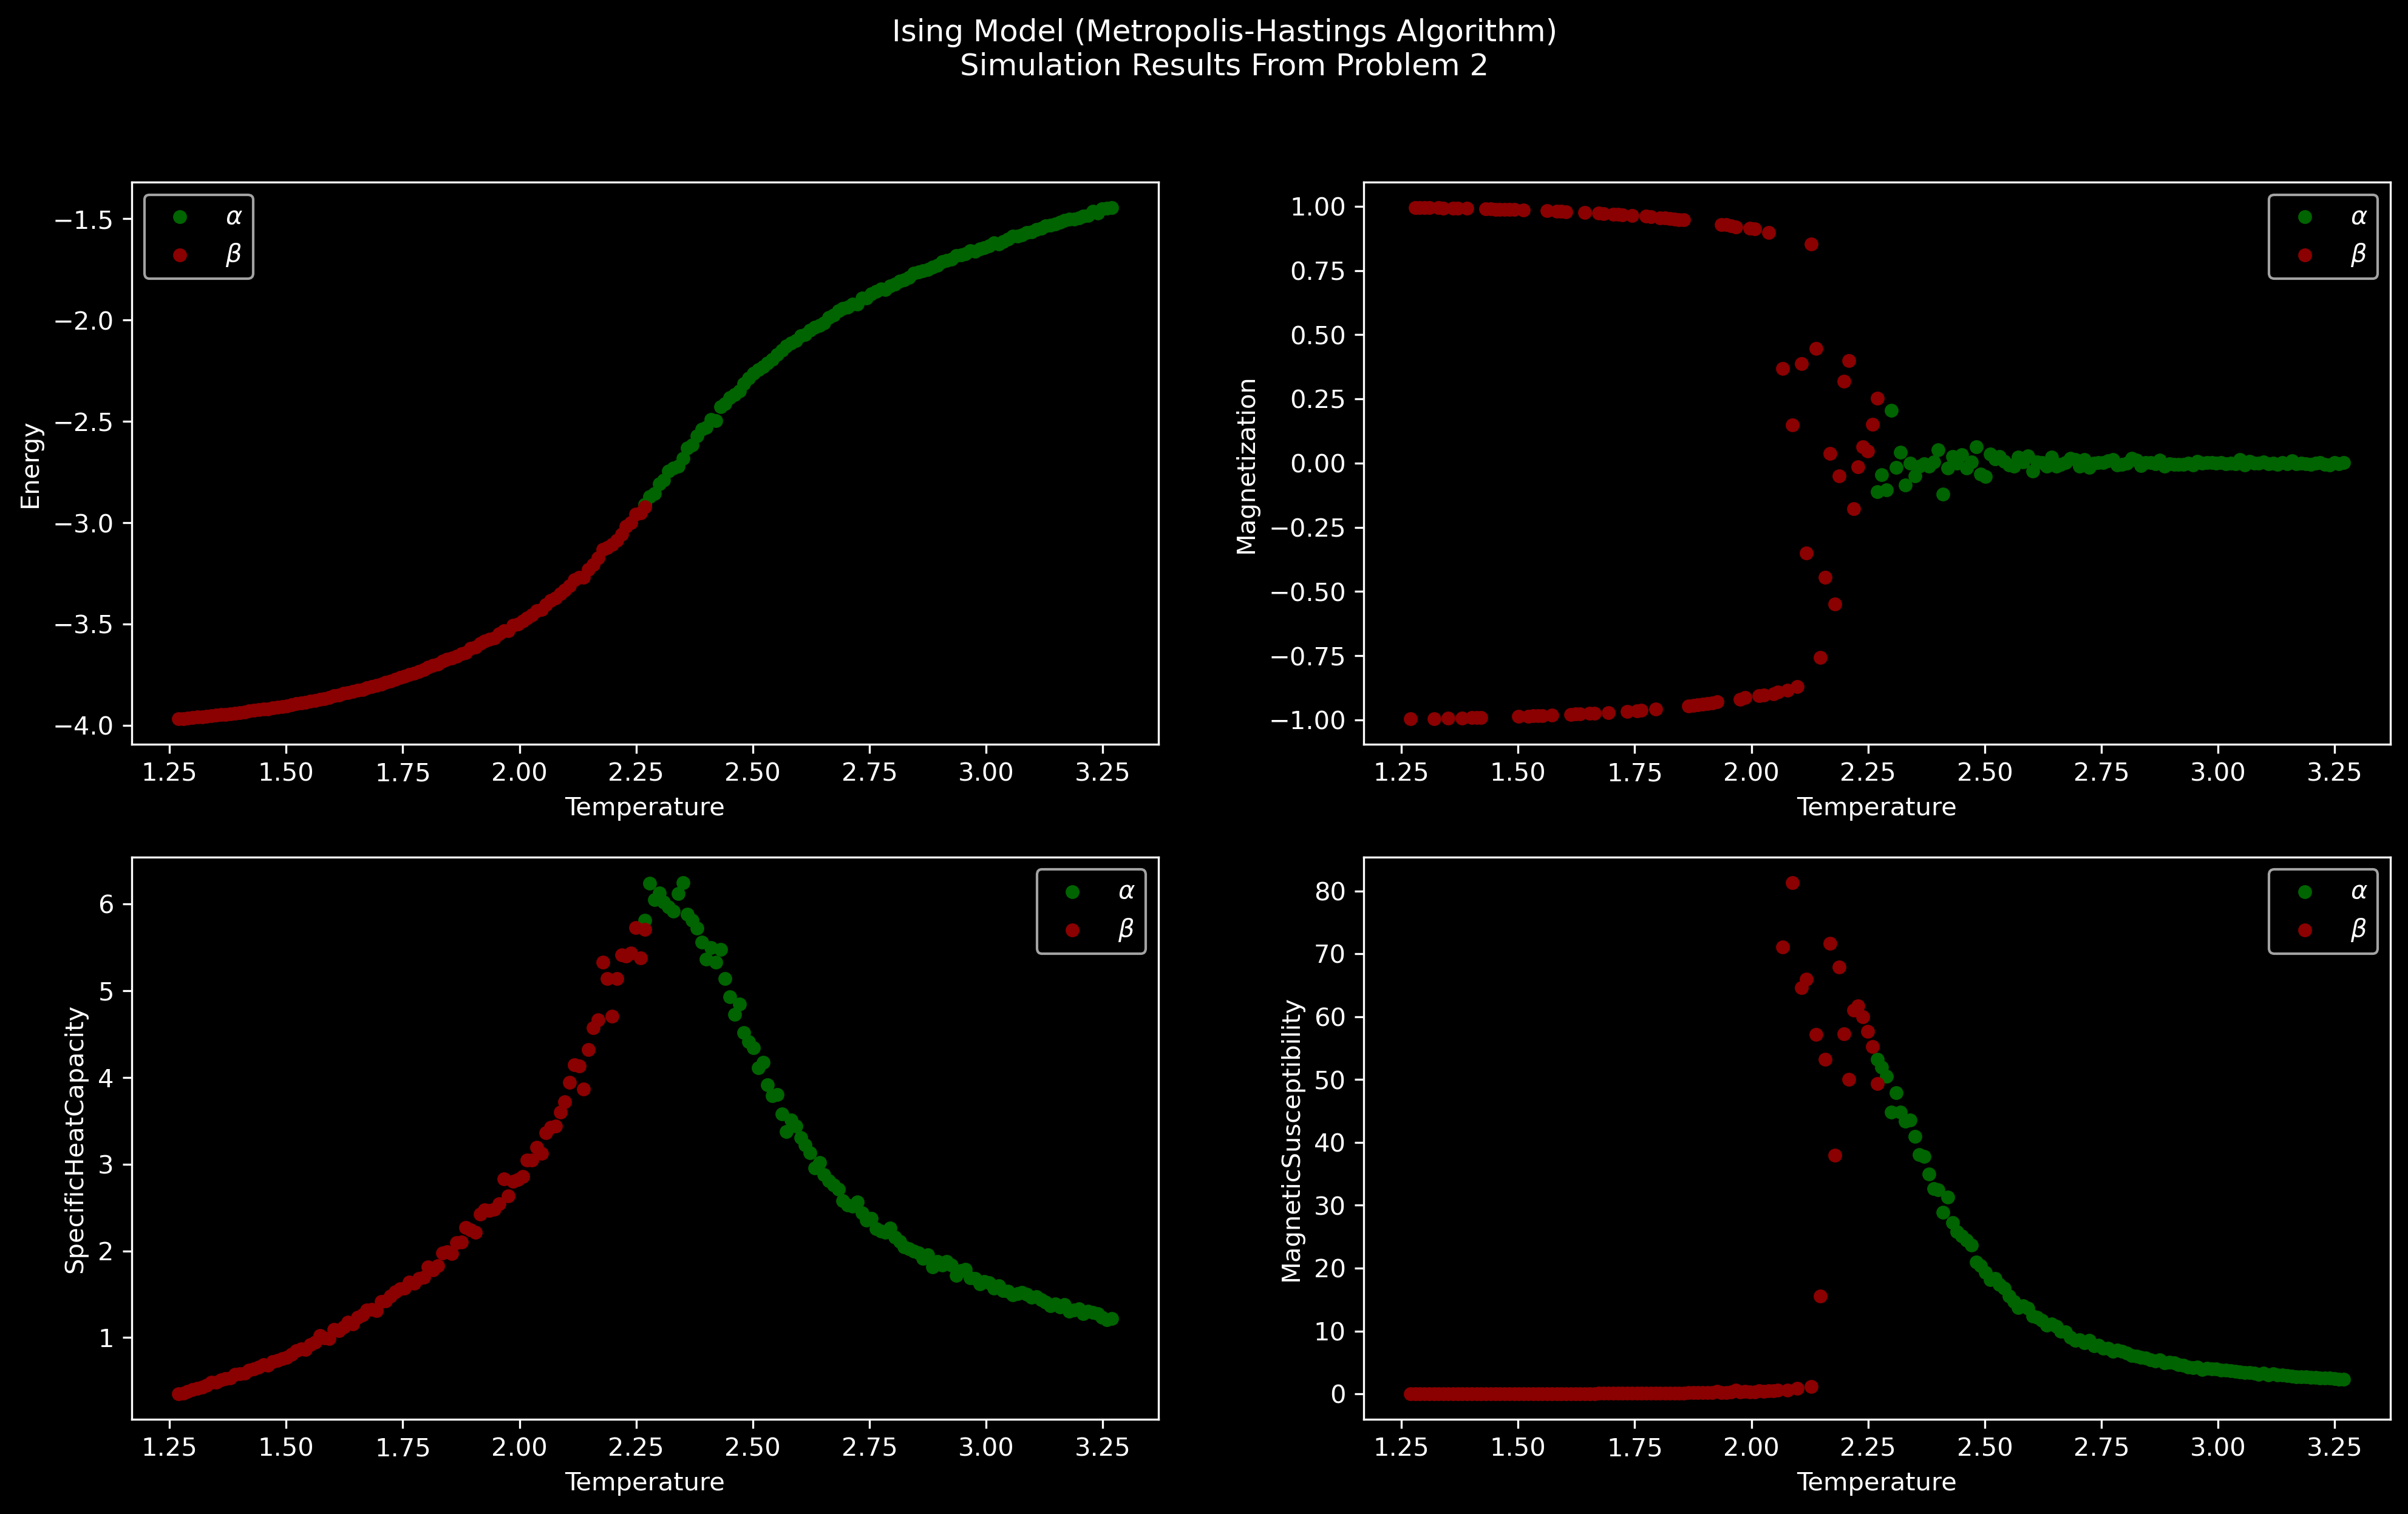

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16,9), dpi=300)
fig.suptitle('Ising Model (Metropolis-Hastings Algorithm)\nSimulation Results From Problem 2')
df2a.plot.scatter('Temperature',                 'Energy', c='darkgreen', ax=ax[0,0], label=r'$\alpha$')
df2a.plot.scatter('Temperature',          'Magnetization', c='darkgreen', ax=ax[0,1], label=r'$\alpha$')
df2a.plot.scatter('Temperature',   'SpecificHeatCapacity', c='darkgreen', ax=ax[1,0], label=r'$\alpha$')
df2a.plot.scatter('Temperature', 'MagneticSusceptibility', c='darkgreen', ax=ax[1,1], label=r'$\alpha$')
df2b.plot.scatter('Temperature',                 'Energy',   c='darkred', ax=ax[0,0],  label=r'$\beta$')
df2b.plot.scatter('Temperature',          'Magnetization',   c='darkred', ax=ax[0,1],  label=r'$\beta$')
df2b.plot.scatter('Temperature',   'SpecificHeatCapacity',   c='darkred', ax=ax[1,0],  label=r'$\beta$')
df2b.plot.scatter('Temperature', 'MagneticSusceptibility',   c='darkred', ax=ax[1,1],  label=r'$\beta$')
fig.savefig('plots/Problem2_simulation')

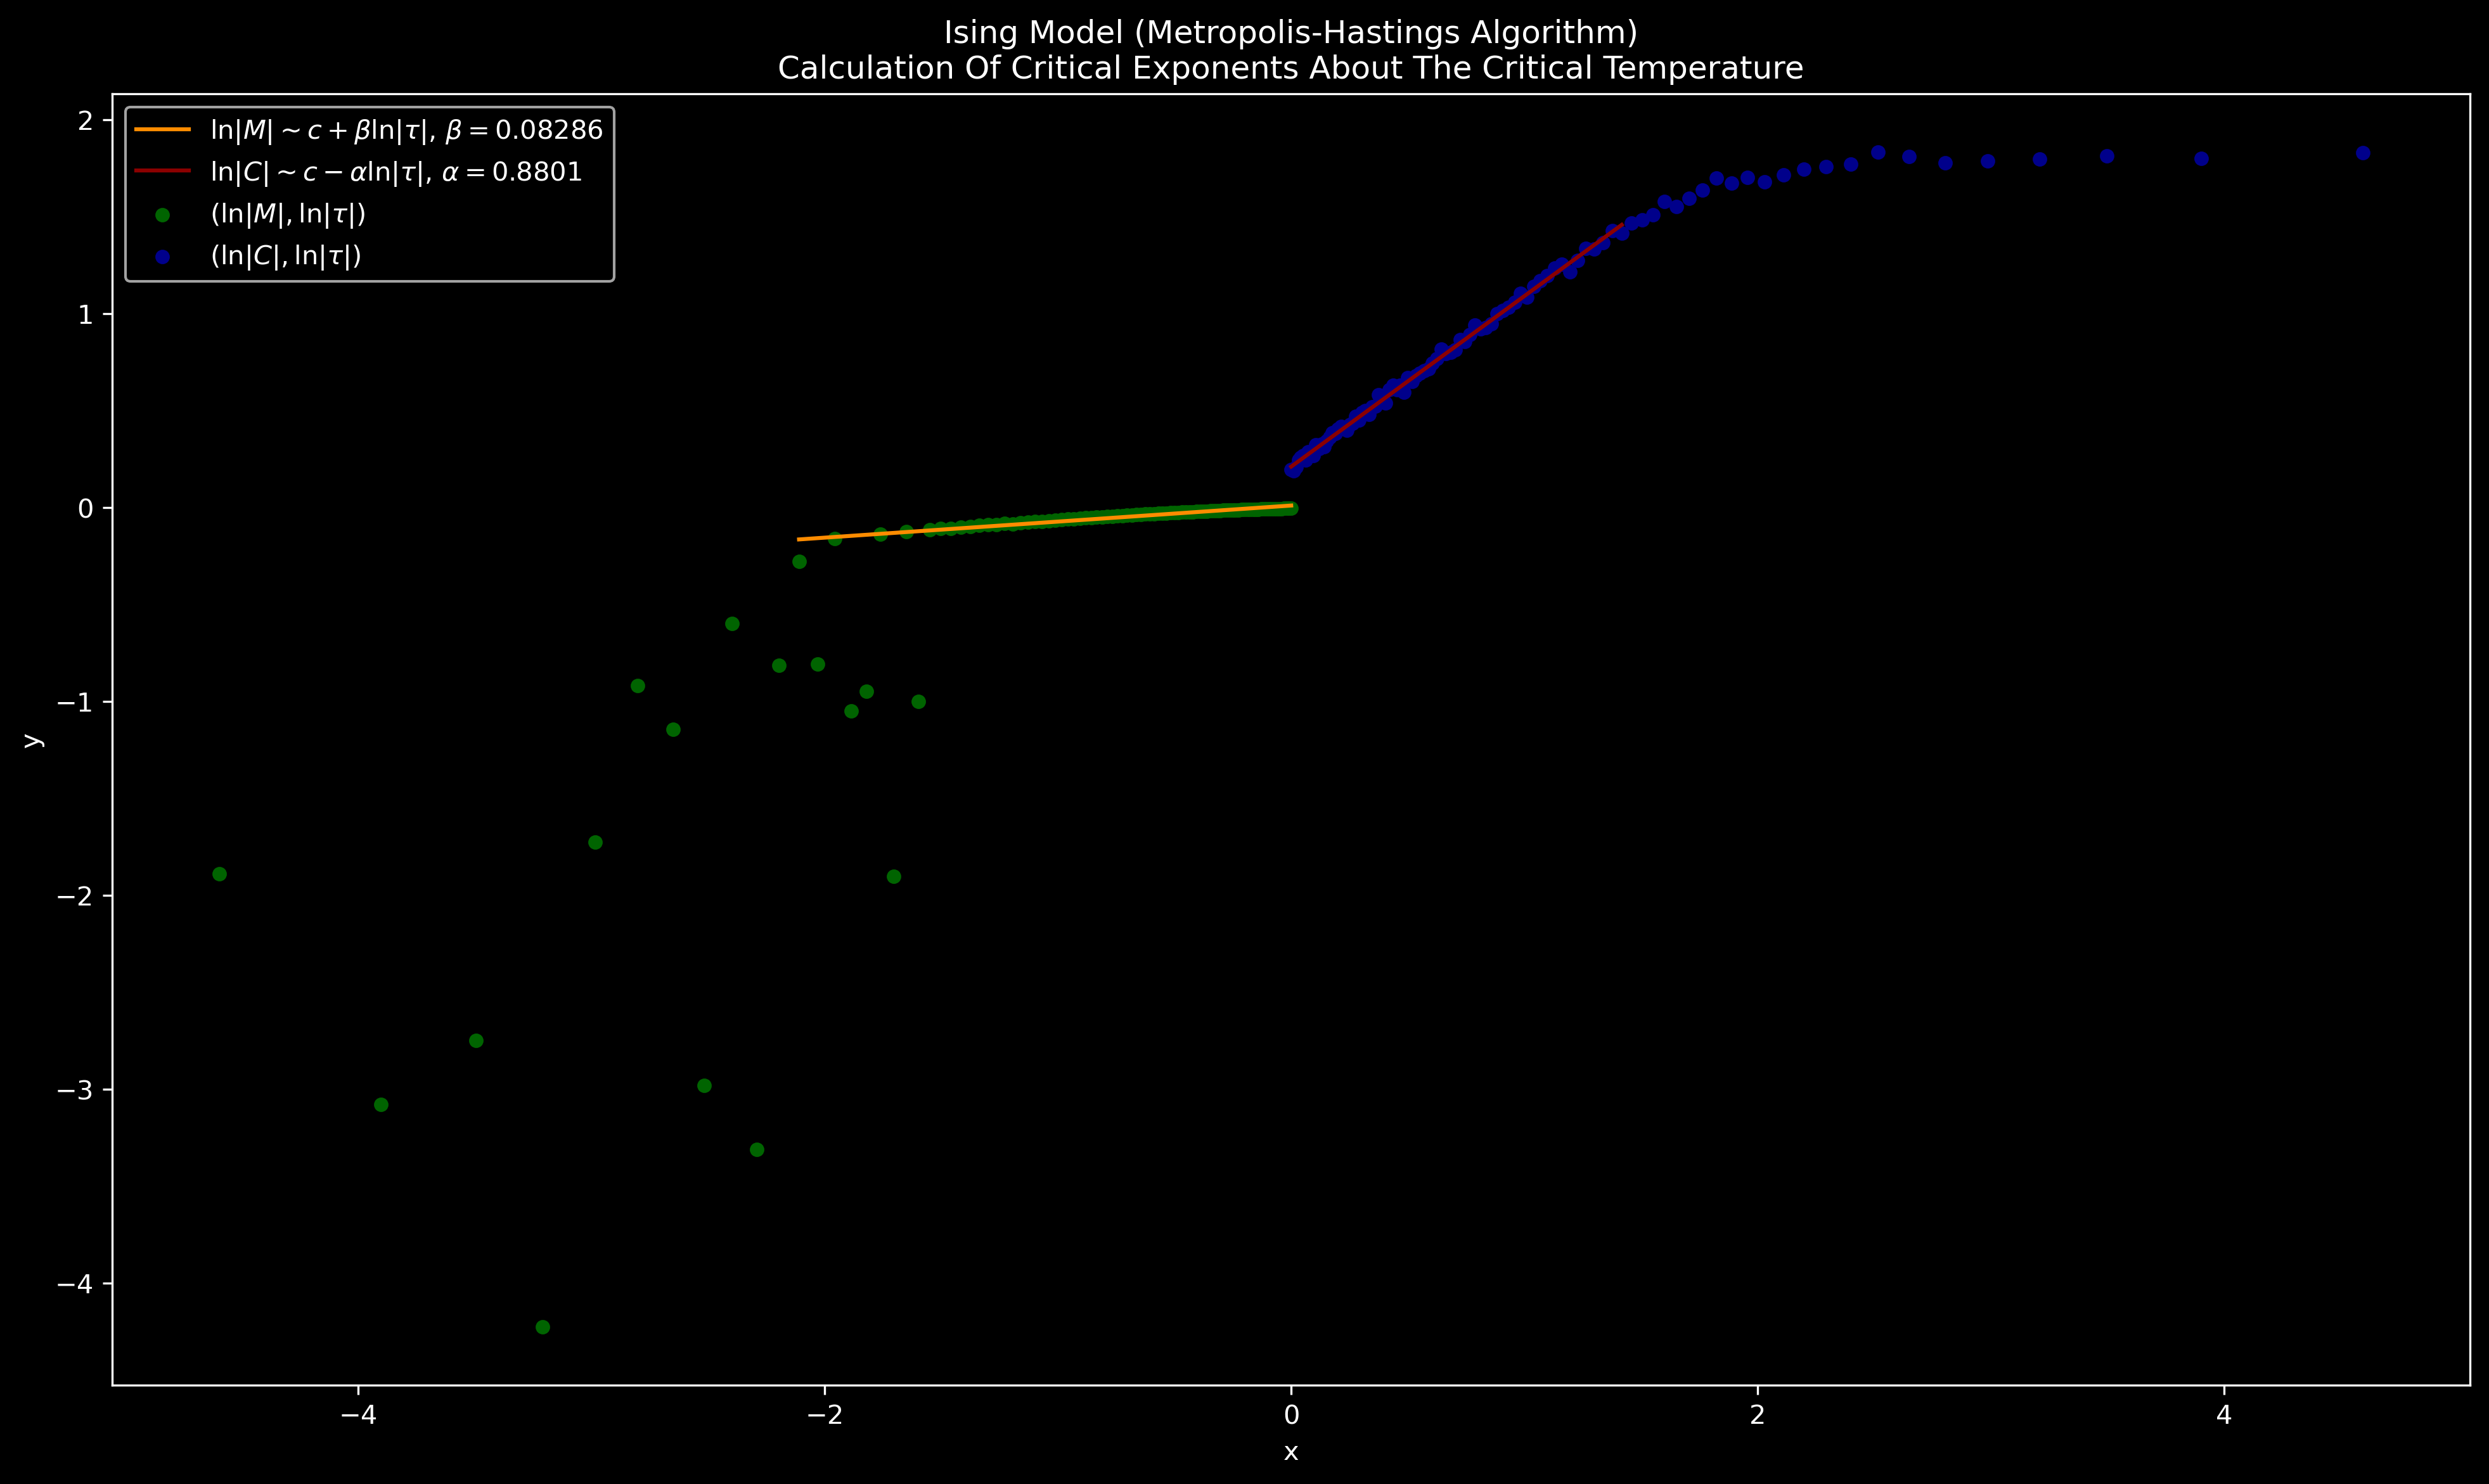

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=300)
ax.set_title('Ising Model (Metropolis-Hastings Algorithm)\nCalculation Of Critical Exponents About The Critical Temperature')
df2b_.plot(       'x', 'fit', ax=ax, c='darkorange', label=rf'$\ln\left|M\right|\sim c+\beta\ln\left|\tau\right|$, $\beta={beta:0.4g}$')
df2a_.plot(       'x', 'fit', ax=ax,   c='darkred', label=rf'$\ln\left|C\right|\sim c-\alpha\ln\left|\tau\right|$, $\alpha={alpha:0.4g}$')
df2b.plot.scatter('x',   'y', ax=ax,  c='darkgreen', label=r'$\left(\ln\left|M\right|,\ln\left|\tau\right|\right)$')
df2a.plot.scatter('x',   'y', ax=ax,    c='darkblue', label=r'$\left(\ln\left|C\right|,\ln\left|\tau\right|\right)$')
ax.legend()
fig.savefig('plots/Problem2_results')

# Problem 3
## 8.7 (p.258)

Obtain the specific heat as a function of temperature for a $10\times10$ square lattice by differentiating the energy and through the fluctuation-dissipation theorem. Show that the two methods give the same result. Which approach is more accurate (for a given amount of computer time)?

In [9]:
model = IsingLattice(rows, cols, J, kB, Tc - 1.25 * dT, Tc + 5. * dT, nT, H0, Hf, 1, nR, sS)
H, T, E, M, C, X = model.simulate()
df3 = pd.DataFrame(
    np.vstack((H, T, E, C, M, X)).T, 
    columns=['MagneticField','Temperature', 'Energy', 'SpecificHeatCapacity', 'Magnetization', 'MagneticSusceptibility'])
df3.to_csv('Problem3_data.csv')

df3['dEdT'] = df3.Energy.diff().div(df3.Temperature.diff().mean()).abs()
df3['SpecificHeatCapacityAlt'] = df3.dEdT.div(df3.Temperature.pow(2))

Running: 0.0 %
Running: 1.0 %


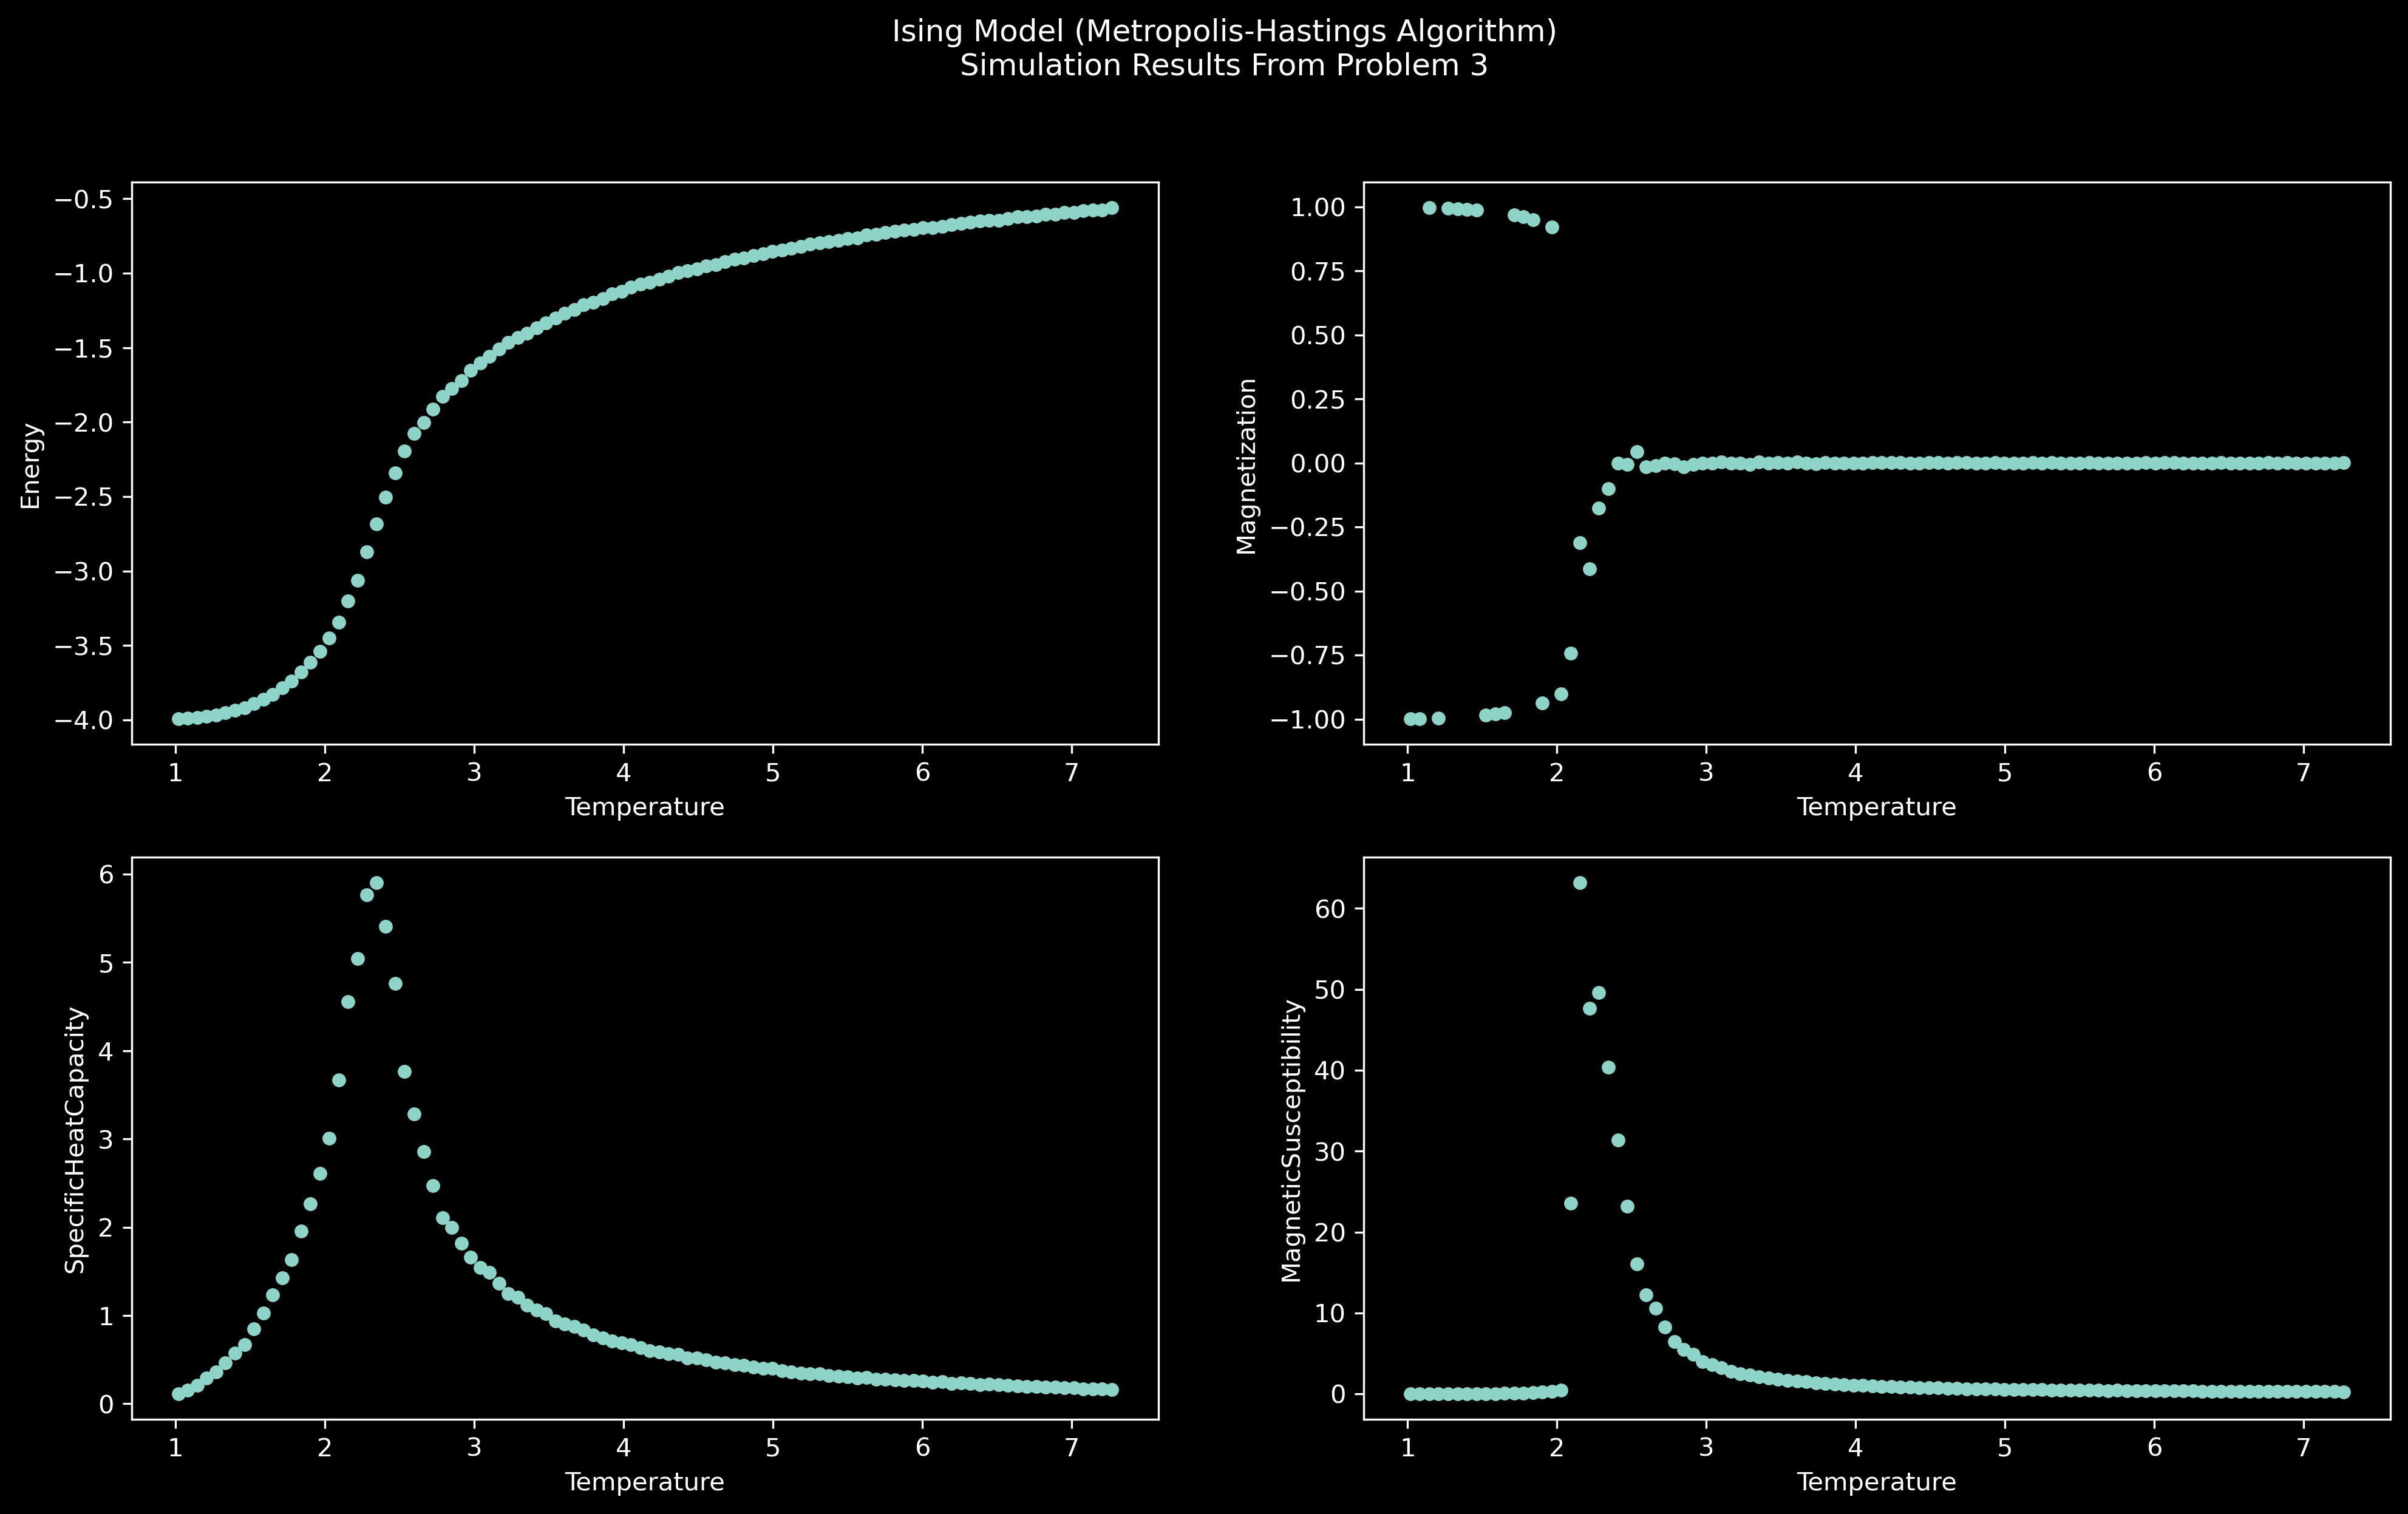

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(16,9), dpi=300)
fig.suptitle('Ising Model (Metropolis-Hastings Algorithm)\nSimulation Results From Problem 3')
df3.plot.scatter('Temperature',                 'Energy', ax=ax[0, 0])
df3.plot.scatter('Temperature',          'Magnetization', ax=ax[0, 1])
df3.plot.scatter('Temperature',   'SpecificHeatCapacity', ax=ax[1, 0])
df3.plot.scatter('Temperature', 'MagneticSusceptibility', ax=ax[1, 1])
fig.savefig('plots/Problem3_simulation')

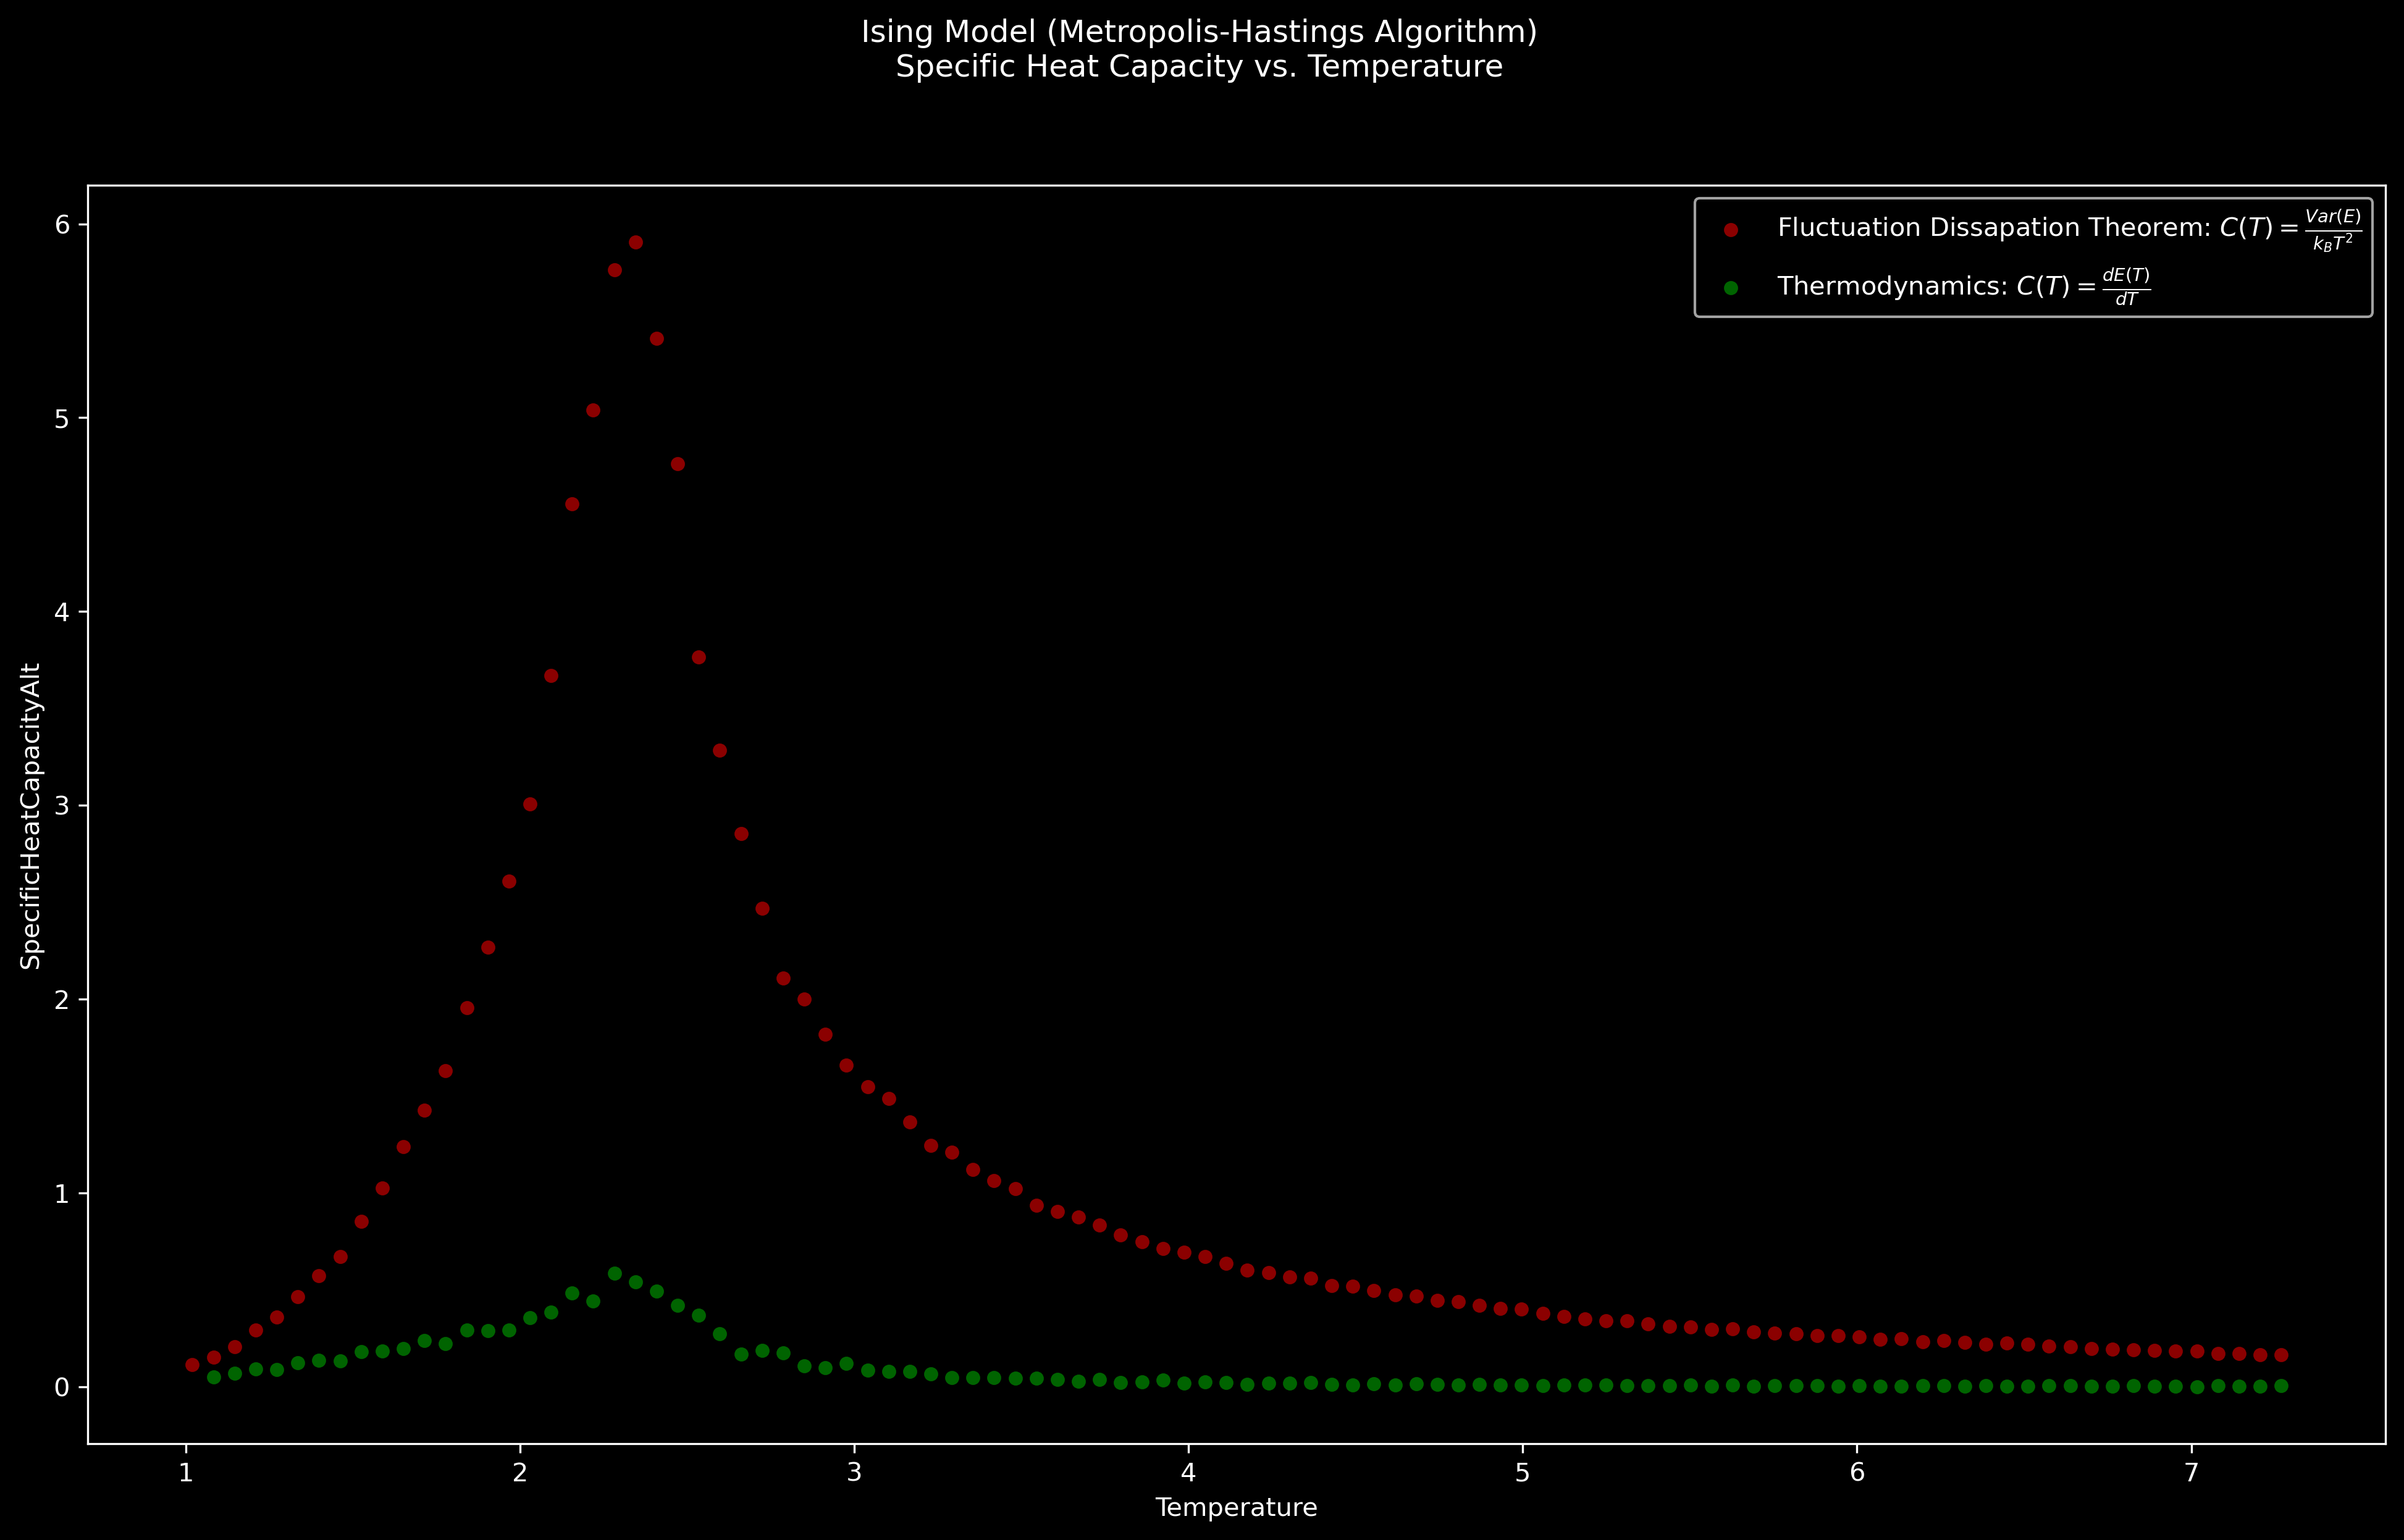

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi=300)
fig.suptitle('Ising Model (Metropolis-Hastings Algorithm)\nSpecific Heat Capacity vs. Temperature')
df3.plot.scatter('Temperature', 'SpecificHeatCapacity', c='darkred', ax=ax, label=r'Fluctuation Dissapation Theorem: $C(T)=\frac{Var(E)}{k_BT^2}$')
df3.plot.scatter('Temperature', 'SpecificHeatCapacityAlt', c='darkgreen', ax=ax, label=r'Thermodynamics: $C(T)=\frac{dE(T)}{dT}$')
fig.savefig('plots/Problem3_results')

# Problem 4
## 8.15 (p.267)

Scaling behavior is found for thermodynamic quantities other than the magnetization. Calculate the susceptibility $\chi$ at various values of $T$ and $H$ around the critical point of the Ising model on a square lattice, and study data collapsing using your results. The scaling form for $\chi$ is 
$$\chi(t, h)=|t|^{-\gamma}g\pm\left(\frac{h}{|t|^{\beta\delta}}\right),$$
where the critical exponent $\gamma=7/4$.



$$\chi(t, h)=|t|^{-\gamma}\chi\left(\pm 1,\frac{h}{|t|^{\beta\delta}}\right),$$

In [12]:
model  = IsingLattice(rows, cols, J, kB, T0, Tc + dT, nT, Hi, Hf, nH, nR//4, sS//4)
H, T, E, M, C, X = model.simulate()
df4 = pd.DataFrame(
    np.vstack((H, T, E, C, M, X)).T, 
    columns=['MagneticField','Temperature', 'Energy', 'SpecificHeatCapacity', 'Magnetization', 'MagneticSusceptibility'])
df4.to_csv('Problem4_data.csv')

11.79 %
Running: 11.8 %
Running: 11.81 %
Running: 11.82 %
Running: 11.83 %
Running: 11.84 %
Running: 11.85 %
Running: 11.86 %
Running: 11.87 %
Running: 11.88 %
Running: 11.89 %
Running: 11.9 %
Running: 11.91 %
Running: 11.92 %
Running: 11.93 %
Running: 11.94 %
Running: 11.95 %
Running: 11.96 %
Running: 11.97 %
Running: 11.98 %
Running: 11.99 %
Running: 12.0 %
Running: 12.01 %
Running: 12.02 %
Running: 12.03 %
Running: 12.04 %
Running: 12.05 %
Running: 12.06 %
Running: 12.07 %
Running: 12.08 %
Running: 12.09 %
Running: 12.1 %
Running: 12.11 %
Running: 12.12 %
Running: 12.13 %
Running: 12.14 %
Running: 12.15 %
Running: 12.16 %
Running: 12.17 %
Running: 12.18 %
Running: 12.19 %
Running: 12.2 %
Running: 12.21 %
Running: 12.22 %
Running: 12.23 %
Running: 12.24 %
Running: 12.25 %
Running: 12.26 %
Running: 12.27 %
Running: 12.28 %
Running: 12.29 %
Running: 12.3 %
Running: 12.31 %
Running: 12.32 %
Running: 12.33 %
Running: 12.34 %
Running: 12.35 %
Running: 12.36 %
Running: 12.37 %
Running: 12.

In [15]:
fig = plt.figure(figsize=(16,16), dpi=300, constrained_layout=True)
fig.suptitle('Ising Model (Metropolis-Hastings Algorithm)\nSimulation Results From Problem 4')

ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(30, 120)
ax1.plot_trisurf(df4.MagneticField, df4.Temperature, df4.Energy, cmap=plt.get_cmap('jet'))
ax1.set_xlabel('Magnetic Field')
ax1.set_ylabel('Temperature')
ax1.set_zlabel('Energy')

ax2 = fig.add_subplot(222, projection='3d')
ax2.view_init(30, 70)
ax2.plot_trisurf(df4.MagneticField, df4.Temperature, df4.Magnetization, cmap=plt.get_cmap('jet'))
ax2.set_xlabel('Magnetic Field')
ax2.set_ylabel('Temperature')
ax2.set_zlabel('Magnetization')

ax3 = fig.add_subplot(223, projection='3d')
ax3.view_init(30, -110)
ax3.plot_trisurf(df4.MagneticField, df4.Temperature, df4.SpecificHeatCapacity, cmap=plt.get_cmap('jet'))
ax3.set_xlabel('Magnetic Field')
ax3.set_ylabel('Temperature')
ax3.set_zlabel('Specific Heat Capacity')

ax4 = fig.add_subplot(224, projection='3d')
ax4.view_init(30, -110)
ax4.plot_trisurf(df4.MagneticField, df4.Temperature, df4.MagneticSusceptibility, cmap=plt.get_cmap('jet'))
ax4.set_xlabel('Magnetic Field')
ax4.set_ylabel('Temperature')
ax4.set_zlabel('Magnetic Susceptibility')

fig.savefig('plots/Problem4_simulation')